# Import library

In [1]:
import os
import json

from pycocotools.coco import COCO
from copy import deepcopy
from random import sample

# Load train and validation data

In [2]:
data_dir = '../../dataset' # data_dir 경로

annot_train = '../../dataset/cv_train_1.json' # Multilabel K-Fold 방식으로 분리된 train set의 annotation
annot_valid = '../../dataset/cv_val_1.json' # Multilabel K-Fold 방식으로 분리된 validation set의 annotation

with open(annot_train) as f:
    data_train = json.load(f)
    
with open(annot_valid) as f:
    data_valid = json.load(f)
    
data_train_major = deepcopy(data_train); data_train_minor = deepcopy(data_train)
data_valid_major = deepcopy(data_valid); data_valid_minor = deepcopy(data_valid)

In [3]:
data_train.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [4]:
print(len(data_train['images']))
data_train['images'][0:3]

3677


[{'width': 1024,
  'height': 1024,
  'file_name': 'train/0003.jpg',
  'license': 0,
  'flickr_url': None,
  'coco_url': None,
  'date_captured': '2021-03-31 12:10:36',
  'id': 3},
 {'width': 1024,
  'height': 1024,
  'file_name': 'train/0005.jpg',
  'license': 0,
  'flickr_url': None,
  'coco_url': None,
  'date_captured': '2021-01-02 16:48:22',
  'id': 5},
 {'width': 1024,
  'height': 1024,
  'file_name': 'train/0008.jpg',
  'license': 0,
  'flickr_url': None,
  'coco_url': None,
  'date_captured': '2020-12-27 17:12:18',
  'id': 8}]

In [5]:
print(len(data_train['annotations']))
data_train['annotations'][0:3]

17307


[{'image_id': 3,
  'category_id': 2,
  'area': 59550.94,
  'bbox': [462.2, 369.4, 233.9, 254.6],
  'iscrowd': 0,
  'id': 10},
 {'image_id': 3,
  'category_id': 6,
  'area': 80710.56,
  'bbox': [773.3, 3.0, 188.4, 428.4],
  'iscrowd': 0,
  'id': 11},
 {'image_id': 5,
  'category_id': 7,
  'area': 41210.0,
  'bbox': [0.0, 148.3, 317.0, 130.0],
  'iscrowd': 0,
  'id': 18}]

# Divide each dataset by class label

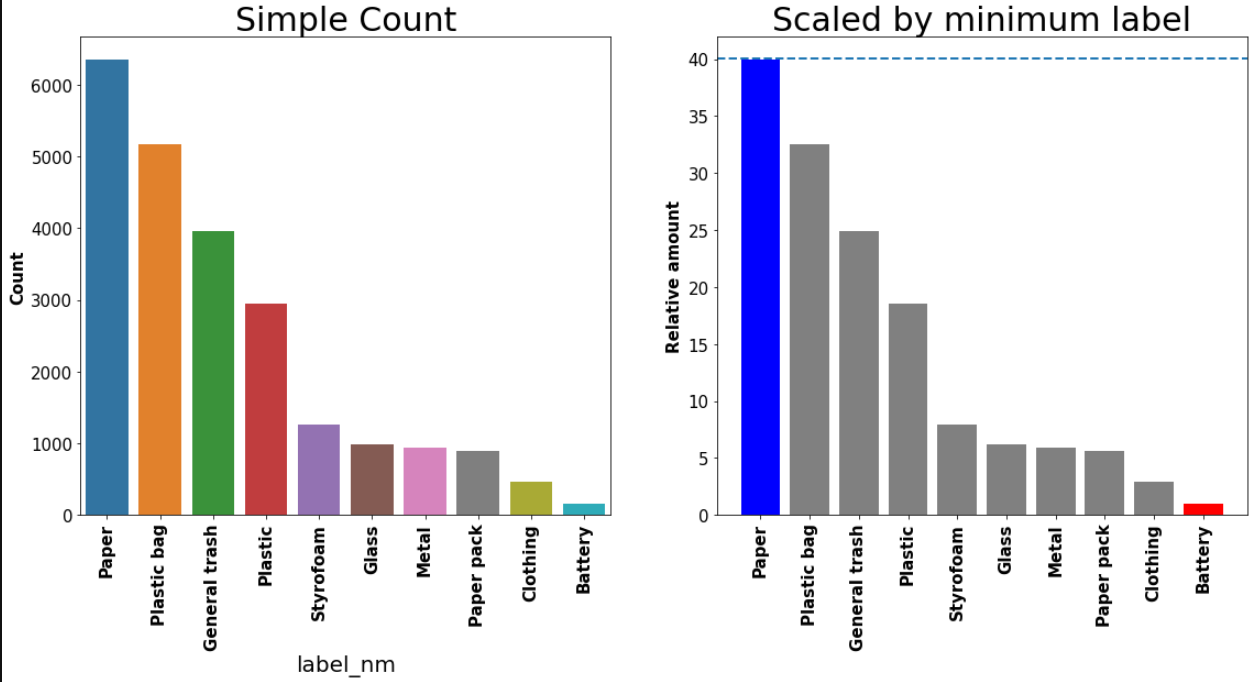

In [6]:
data_train['categories']

[{'id': 0, 'name': 'General trash', 'supercategory': 'General trash'},
 {'id': 1, 'name': 'Paper', 'supercategory': 'Paper'},
 {'id': 2, 'name': 'Paper pack', 'supercategory': 'Paper pack'},
 {'id': 3, 'name': 'Metal', 'supercategory': 'Metal'},
 {'id': 4, 'name': 'Glass', 'supercategory': 'Glass'},
 {'id': 5, 'name': 'Plastic', 'supercategory': 'Plastic'},
 {'id': 6, 'name': 'Styrofoam', 'supercategory': 'Styrofoam'},
 {'id': 7, 'name': 'Plastic bag', 'supercategory': 'Plastic bag'},
 {'id': 8, 'name': 'Battery', 'supercategory': 'Battery'},
 {'id': 9, 'name': 'Clothing', 'supercategory': 'Clothing'}]

## Set major and minor categories

In [7]:
major_category = [1, 7, 0, 5] # Paper, Plastic bag, General trash, Plastic
minor_category = [x for x in range(1, 10) if x not in major_category] # Styrofoam, Glass, Metal, Paper pack, Clothing, Battery
print(f'Major categories: {major_category}')
print(f'Minor categories: {minor_category}')

Major categories: [1, 7, 0, 5]
Minor categories: [2, 3, 4, 6, 8, 9]


In [8]:
# Remove unnecessary annotations
data_train_major['annotations'] = [x for x in data_train['annotations'] if x['category_id'] in major_category]
data_train_minor['annotations'] = [x for x in data_train['annotations'] if x['category_id'] in minor_category]

data_valid_major['annotations'] = [x for x in data_valid['annotations'] if x['category_id'] in major_category]
data_valid_minor['annotations'] = [x for x in data_valid['annotations'] if x['category_id'] in minor_category]

# Remove unnecessary category id
data_train_major['categories'] = [x for x in data_train['categories'] if x['id'] in major_category]
data_train_minor['categories'] = [x for x in data_train['categories'] if x['id'] in minor_category]

data_valid_major['categories'] = [x for x in data_valid['categories'] if x['id'] in major_category]
data_valid_minor['categories'] = [x for x in data_valid['categories'] if x['id'] in minor_category]

## Check removal process

In [9]:
print(f'Major categories: {major_category}')
print(f'Minor categories: {minor_category}')

Major categories: [1, 7, 0, 5]
Minor categories: [2, 3, 4, 6, 8, 9]


In [10]:
sample(data_train_major['annotations'], 2)

[{'image_id': 3665,
  'category_id': 7,
  'area': 19777.65,
  'bbox': [470.0, 347.2, 118.5, 166.9],
  'iscrowd': 0,
  'id': 17338},
 {'image_id': 3913,
  'category_id': 7,
  'area': 391508.58,
  'bbox': [307.6, 267.5, 517.8, 756.1],
  'iscrowd': 0,
  'id': 18608}]

In [11]:
sample(data_train_minor['annotations'], 2)

[{'image_id': 2648,
  'category_id': 3,
  'area': 2983.02,
  'bbox': [595.0, 223.5, 49.8, 59.9],
  'iscrowd': 0,
  'id': 12571},
 {'image_id': 83,
  'category_id': 6,
  'area': 90956.18,
  'bbox': [287.8, 526.0, 364.7, 249.4],
  'iscrowd': 0,
  'id': 388}]

In [12]:
sample(data_valid_major['annotations'], 2)

[{'image_id': 118,
  'category_id': 7,
  'area': 15412.32,
  'bbox': [962.0, 0.0, 61.6, 250.2],
  'iscrowd': 0,
  'id': 570},
 {'image_id': 2824,
  'category_id': 7,
  'area': 202597.8,
  'bbox': [261.1, 169.1, 487.6, 415.5],
  'iscrowd': 0,
  'id': 13272}]

In [13]:
sample(data_valid_minor['annotations'], 2)

[{'image_id': 2948,
  'category_id': 4,
  'area': 21554.64,
  'bbox': [674.2, 366.2, 176.1, 122.4],
  'iscrowd': 0,
  'id': 13845},
 {'image_id': 1215,
  'category_id': 2,
  'area': 273823.76,
  'bbox': [87.0, 217.9, 666.4, 410.9],
  'iscrowd': 0,
  'id': 5801}]

# Save new data

In [14]:
def save_json(data: dict, file_nm: str, dir_path=data_dir):
    with open(os.path.join(data_dir, file_nm), 'w') as outfile:
        json.dump(data, outfile)
              

data_list = [data_train_major,
             data_train_minor, 
             data_valid_major, 
             data_valid_minor
            ]
file_nm_list = ['cv_train_1_major.json',
                'cv_train_1_minor.json',
                'cv_val_1_major.json',
                'cv_val_1_minor.json',
               ]

for data, file_nm in zip(data_list, file_nm_list):
    save_json(data, file_nm)

# Test json result

In [15]:
with open(os.path.join(data_dir, file_nm_list[0])) as f:
    data_test = json.load(f)

In [16]:
print(*sample(data_test['annotations'], 5), sep='\n')

{'image_id': 1202, 'category_id': 7, 'area': 202333.2, 'bbox': [398.2, 218.8, 327.4, 618.0], 'iscrowd': 0, 'id': 5772}
{'image_id': 3214, 'category_id': 0, 'area': 1369.44, 'bbox': [621.3, 44.9, 63.4, 21.6], 'iscrowd': 0, 'id': 15230}
{'image_id': 1158, 'category_id': 7, 'area': 59442.74, 'bbox': [365.7, 392.6, 196.7, 302.2], 'iscrowd': 0, 'id': 5555}
{'image_id': 4187, 'category_id': 1, 'area': 39671.16, 'bbox': [498.8, 198.8, 212.6, 186.6], 'iscrowd': 0, 'id': 19789}
{'image_id': 3427, 'category_id': 1, 'area': 41142.57, 'bbox': [296.6, 52.4, 224.7, 183.1], 'iscrowd': 0, 'id': 16238}
